# Testing the model

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

### More information about the dataset: 
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

## 1. Import the relevant libraries

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## 2. Load the data

In [25]:
raw_data = pd.read_csv('Bank_data.csv')
raw_data.head(20)

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
5,5,0.899,0.0,0.0,1.0,0.0,126.0,no
6,6,4.962,0.0,0.0,0.0,0.0,84.0,no
7,7,4.858,0.0,1.0,0.0,0.0,17.0,no
8,8,4.962,0.0,0.0,0.0,0.0,704.0,yes
9,9,4.865,0.0,0.0,0.0,0.0,185.0,no


We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into Boolean values in order to run regressions.

In [26]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = raw_data.copy()
# Removes the index column thata comes with the data
data = data.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
data['y'] = data['y'].map({'yes':1, 'no':0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [27]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [28]:
y = data['y']
x1 = data['duration']

## 3. Simple Logistic Regression
Run the regression and graph the scatter plot.

In [29]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.2121
Time:                        00:28:41   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

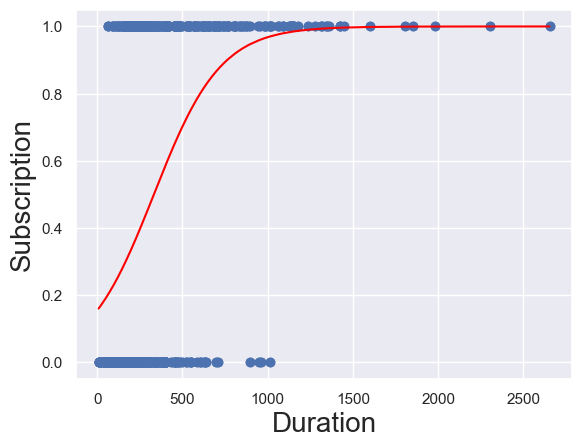

<Figure size 2000x2000 with 0 Axes>

In [30]:
import numpy as np
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')

# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params.iloc[0],results_log.params.iloc[1]))
x_sorted = np.sort(np.array(x1))
ax = plt.scatter(x1,y,color='C0')
ax2 = plt.plot(x_sorted,f_sorted,color='red')
plt.figure(figsize=(20,20))
plt.show()

## 4. Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variables

In [31]:
# To avoid writing them out every time, we save the names of the estimators of our model in a list. 
estimators=['interest_rate','credit','march','previous','duration']

X1_all = data[estimators]
y = data['y']

In [32]:
X_all = sm.add_constant(X1_all)
reg_logit = sm.Logit(y,X_all)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.514     
Date:               2024-11-27 00:28 AIC:              360.7836  
No. Observations:   518              BIC:              386.2834  
Df Model:           5                Log-Likelihood:   -174.39   
Df Residuals:       512              LL-Null:          -359.05   
Converged:          1.0000           LLR p-value:      1.2114e-77
No. Iterations:     7.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

In [ ]:
#results_logit.summary()

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

In [34]:
#Same function in '2_1_Logistic_reg_statsmodels\statsmodels_logistic_regression.ipynb'
def confusion_matrix_test(data, predictions_target, model):
    """
    Confusion matrix 
    
    Parameters
    ----------
    data: pd.DataFrame
        A DataFrame containing all mapped data, including features and the target variable.
    predictions_target: str
        The name of the column in 'data' that contains the actual values (e.g., 'Admitted').
        
    model: LogitResults object
        This is the fitted model variable (e.g., results_log).
    """
    
    # Get the actual values (true values; targets)
    actual_values = data[predictions_target]
    
    # Prepare the test data to be predicted by dropping the target column
    test_data = data.drop(columns=[predictions_target])
    test_data = sm.add_constant(test_data)  # Add constant for intercept

    # Predict the values using the Logit model
    pred_values = model.predict(test_data)
    
    # Specify the bins 
    bins = np.array([0, 0.5, 1])
    
    # Create a histogram, where if values are between 0 and 0.5 they will be considered 0,
    # if they are between 0.5 and 1, they will be considered 1
    cm = np.histogram2d(actual_values, pred_values > 0.5, bins=bins)[0]
    
    # Calculate the accuracy
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    
    # Improve readability of the confusion matrix
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0', 'Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0', 1: 'Actual 1'})

    # Capture the name of the DataFrame variable (data) used in the function
    data_name = [name for name in globals() if globals()[name] is data][0]

    print(f'The accuracy of the trained model for {data_name} is: {accuracy * 100:.2f}%')

    # Return the confusion matrix and the accuracy
    return cm_df, accuracy

In [47]:
train_data = data.drop('may', axis=1)
train_df, accuracy = confusion_matrix_test(train_data,'y',results_logit)
train_df

The accuracy of the trained model for train_data is: 86.29%


,Predicted 0,Predicted 1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


## 5. Test the model

Load the test data from the 'Bank_data_testing.csv' file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

In [48]:
# We have to load data our model has never seen before.
raw_data2 = pd.read_csv('Bank_data_testing.csv')
data_test = raw_data2.copy()
# Removes the index column thata comes with the data
data_test = data_test.drop(['Unnamed: 0','may'], axis = 1)

# Coverting the outcome variable into 1s and 0s again. 
data_test['y'] = data_test['y'].map({'yes':1, 'no':0})
data_test.head()

,interest_rate,credit,march,previous,duration,y
0,1.313,0.0,1.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

Compare the confusion matrix and accuracy for the train and test data.

In [44]:
# Determine the Confusion Matrix and the accuracy of the model with the new data. Note that the model itself stays the same (results_logit).
# test accuracy
test_df, accuracy = confusion_matrix_test(data_test,'y',results_logit)
test_df

The accuracy of the trained model for data_test is: 86.04%


,Predicted 0,Predicted 1
Actual 0,93.0,18.0
Actual 1,13.0,98.0


In [46]:
# Compare these values to the Confusion Matrix and the accuracy of the model with the old data.
# train accuracy
train_df, accuracy = confusion_matrix_test(train_data,'y',results_logit)
train_df

The accuracy of the trained model for train_data is: 86.29%


,Predicted 0,Predicted 1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


Looking at the test acccuracy we see a number which is a tiny bit lower (86.04%), compared to the train accuracy (86.29%). 

In general, we always expect the test accuracy to be lower than the train one. If the test accuracy is higher, this is just due to luck.

Note: when you run the regression, you may get different numbers than I!